# Challenge: Iterate and Evaluate Your Classifier
Unit 2 / Lesson 3 / Project 4

It's time to revisit your classifier from the previous assignment.
Using the evaluation techniques we've covered here, look at your classifier's performance in more detail.
Then go back and iterate by engineering new features, removing poor features, or tuning parameters.
Repeat this process until you have five different versions of your classifier.

Once you've iterated, answer these questions to compare the performance of each:
- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- Which features seemed to be most impactful to performance?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Revisit Our Classifier

In [36]:
# Grab and process the raw data.
PATH_amzn = ('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sentiment_labelled_sentences/amazon_cells_labelled.txt')
PATH_imdb = ('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sentiment_labelled_sentences/imdb_labelled.txt')
PATH_yelp = ('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sentiment_labelled_sentences/yelp_labelled.txt')

amzn = pd.read_csv(PATH_amzn, delimiter='\t', header=None)
imdb = pd.read_csv(PATH_imdb, delimiter='\t', header=None)
yelp = pd.read_csv(PATH_yelp, delimiter='\t', header=None)

for i in [amzn, imdb, yelp]:
    i.columns = ['sentence', 'score']
    print(len(i))

amzn.head()

1000
748
1000


,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [37]:
pos_list = ['happy', 'great', 'music', 'glad', 'smart', 'friend', 'family',
            'interest', 'laugh', 'fun', 'entertain', 'joke', 'excellent',
            'cute', 'super', 'brilliant', 'mother', 'love', 'internet', 'freedom',
            'attract', 'awesome', 'fantastic', 'win', 'easy', 'sky', 'comfort',
            'sweet', 'angel', 'wonder', 'free', 'song', 'funny', 'pleasant',
            'joy', 'fine', 'party', 'amazing', 'hug', 'shine', 'sun', 'earn', 'good']

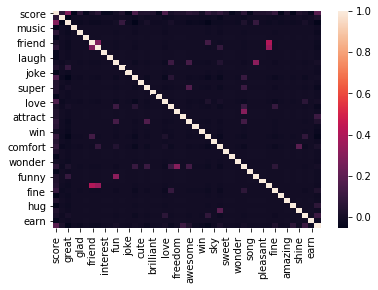

In [38]:
# create a feature for each word in pos_new
for i in pos_list:
    amzn[str(i)] = amzn.sentence.str.contains(
        str(i),
        case=False
    )

# check for correlation
sns.heatmap(amzn.corr());

In [39]:
data = amzn.iloc[:,2:]
target = amzn['score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

print('Success rate of our model: {}'
      .format((data.shape[0] - (target != y_pred).sum())/data.shape[0]*100), '%')

Number of mislabeled points out of a total 1000 points: 265
Success rate of our model: 73.5 %


### Evaluate Classifer's Peformance

In [40]:
# let's look at a confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(target, y_pred)
print(cf)

[[462  38]
 [227 273]]


In [41]:
print('{} false positive sentences identified'
      .format(cf[1,0]))
print('{} false negative sentences identified'
      .format(cf[0,1]))
print()

sen = (cf[1,1]/cf[1].sum()*100)
print('Sensitivity:', sen, '%')
print('{} percent of total {} positives correctly identified'
      .format(cf[1,1], cf[1].sum() ))
print()

spe = (cf[0,0]/cf[0].sum()*100)
print('Specificity:', spe, '%')
print('{} percent of total {} negatives correctly identified'
      .format(cf[0,0], cf[0].sum() ))

227 false positive sentences identified
38 false negative sentences identified

Sensitivity: 54.6 %
273 percent of total 500 positives correctly identified

Specificity: 92.4 %
462 percent of total 500 negatives correctly identified


Looks like our model is particularly good at identifying negative sentences, with a success rate of 92.4%.
Our model falls short when identifying positive sentences, only correctly identifying them 54.6% of the time.

In [45]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=20)

print('with 20% holdout: ' +
      str(bnb.fit(X_train, Y_train).score(X_test, Y_test)) )
print('testing on sample: ' + 
     str(bnb.fit(data, target).score(data,target)) )

with 20% holdout: 0.685
testing on sample: 0.735


It looks like our model isn't overfitting, _thanks in part to the independent nature of a Naive Bayes model_.

Let's see if we can gain more insight in our model performance with cross validation.

In [46]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(bnb, data, target, cv=10)
print(cvs)
print('Average cross_val_score: {}'
      .format(sum(cvs)/len(cvs)*100), '%')

[0.73 0.72 0.77 0.75 0.71 0.71 0.74 0.66 0.72 0.74]
Average cross_val_score: 72.5 %


It looks like are cross validation scores are pretty consistent, so we've confirmed our model isn't overfitting our data.

Our data is 50% positive sentences and 50% negative sentences, so our model as a baseline rate of 50%, any prediction has a 50% chance of success.
This means that our model is 22.5% more successful than the baseline.

We saw in our confusion matrix that our model has a 92.4% success rate when predicting negative sentences.
This means our model is 42.4% better than the baseline at predicting negative sentences.

Unfortunately, our model only has a 54.6% success rate when predicting positive sentences.
This means our model is only 4.6% better than the baseline at predicting positive sentences.

### Create Five New Classifiers